# Load the Raw Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/NCI/Sem 1/DMML/DataSets/BankMarketing/bank-additional-full.csv", sep =";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing

In [21]:
#Marital information doesn't seem appropriate for our analysis, so we will drop it
del df['marital']

In [22]:
#job feature
##Since, there are lot of labels we will replace the labels with their frequency
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [23]:
job_map = df['job'].value_counts().to_dict()
df['job_new'] = df['job'].map(job_map)
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_new
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1060
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969
2,37,services,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,10422
4,56,services,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969


In [24]:
#education feature
##Since, there are lot of labels we will replace the labels with their frequency
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [25]:
edu_map = df['education'].value_counts().to_dict()
df['edu_new'] = df['education'].map(edu_map)
df.head()  

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_new,edu_new
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1060,4176
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515
2,37,services,high.school,no,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,10422,2292
4,56,services,high.school,no,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515


In [26]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [27]:
month_dic = {'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month_new'] = df['month'].map(month_dic)

In [62]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_new,edu_new,month_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1060,4176,5.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,10422,2292,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3969,9515,5.0


In [28]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [29]:
week_dic = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
df['day_of_week_new'] = df['day_of_week'].map(week_dic)

In [29]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['contact_new'] = le.fit_transform(df['contact'])
df['default_new'] = le.fit_transform(df['default'])
df['housing_new'] = le.fit_transform(df['housing'])
df['loan_new'] = le.fit_transform(df['loan'])
df['poutcome_new'] = le.fit_transform(df['poutcome'])
df['subscribe'] = le.fit_transform(df['y'])
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,job_new,edu_new,month_new,day_of_week_new,contact_new,default_new,housing_new,loan_new,poutcome_new,subscribe
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,...,1060,4176,5,1,1,0,0,0,1,0
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,...,3969,9515,5,1,1,1,0,0,1,0
2,37,services,high.school,no,yes,no,telephone,may,mon,226,...,3969,9515,5,1,1,0,2,0,1,0
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,10422,2292,5,1,1,0,0,0,1,0
4,56,services,high.school,no,no,yes,telephone,may,mon,307,...,3969,9515,5,1,1,0,0,2,1,0


In [31]:
#Exploratory Data Analysis
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_new,edu_new,month_new,day_of_week_new,contact_new,default_new,housing_new,loan_new,poutcome_new,subscribe
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,6656.047490,7971.143246,6.607896,2.979581,0.365252,0.208872,1.071720,0.327425,0.930101,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,3511.443199,3487.919982,2.040998,1.411514,0.481507,0.406686,0.985314,0.723616,0.362886,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,330.000000,18.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2924.000000,5243.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,6743.000000,9515.000000,6.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,10422.000000,12168.000000,8.000000,4.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,10422.000000,12168.000000,12.000000,5.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


# Data Visualisation and Exploratory Data Analysis

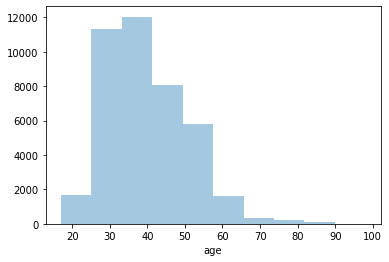

In [32]:
#1.age
sns.distplot(df['age'], kde=False,bins=10)

#It is visible that maximum customers are of age ranging from 25-40

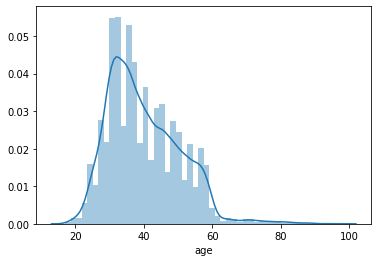

In [33]:
#Let's check the distribution plot
sns.distplot(df['age'])

The distribution is positvely skewed

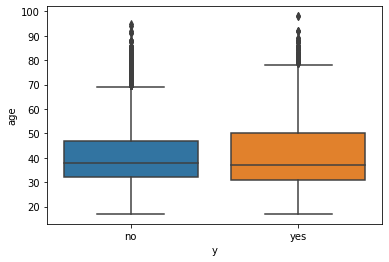

In [34]:
#Let's compare the age feature with our target variable
sns.boxplot(x='y',y='age',data=df)

The median for both the responses is almost simiar, but it shows that there are lot of outliers

# Visualize the subscription and contact rate by age 

In [35]:
lst = [df]
for column in lst:
    column.loc[column['age'] < 30, 'age_group'] = 20
    column.loc[(column['age'] > 30) & (column['age'] < 39) , 'age_group'] = 30
    column.loc[(column['age'] > 40) & (column['age'] < 49) , 'age_group'] = 40
    column.loc[(column['age'] > 50) & (column['age'] < 59) , 'age_group'] = 50
    column.loc[column['age'] > 59, 'age_group'] = 60

In [36]:
cnt_age_subscribe = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
cnt_age_subscribe = cnt_age_subscribe.transpose()

In [37]:
age = pd.DataFrame(df['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscribed'] = cnt_age_subscribe['yes']
age.drop('age_group',axis=1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

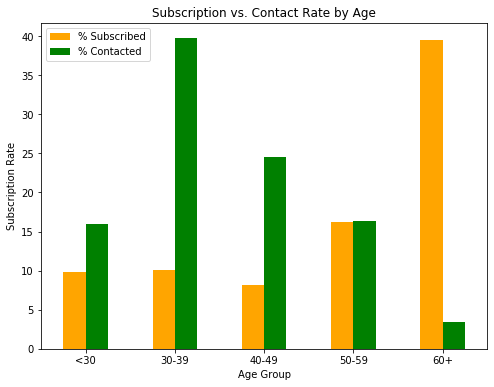

In [38]:
plot_age = age[['% Subscribed','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('orange','green'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

<b>Insights: target the youngest and the oldest instead of the middle-aged</b>

Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.

The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However, orange vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

# Visualize the subscription rate by Job

In [40]:
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

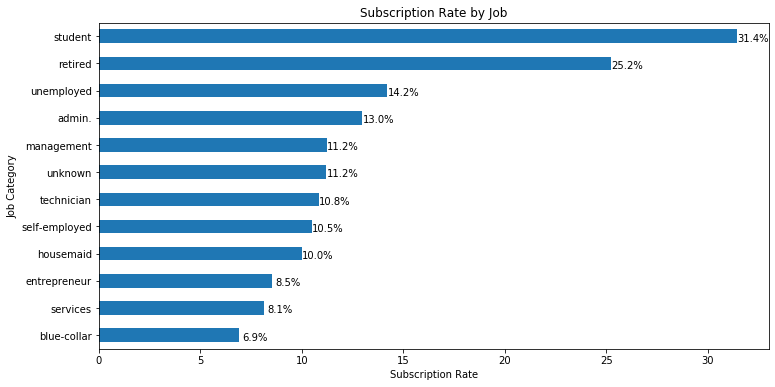

In [41]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<b>Insights: target students and retired clients</b>

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

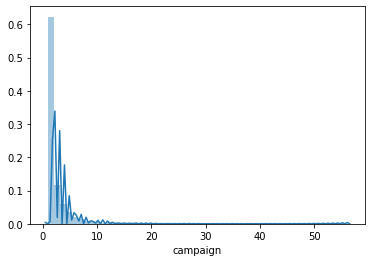

In [11]:
#3.campaign
sns.distplot(df['campaign'])

In [63]:
count_month_response_pct = pd.crosstab(df['y'],df['month_new']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [64]:
month = pd.DataFrame(df['month_new'].value_counts())
month['% Contacted'] = month['month_new']*100/month['month_new'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_new',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)

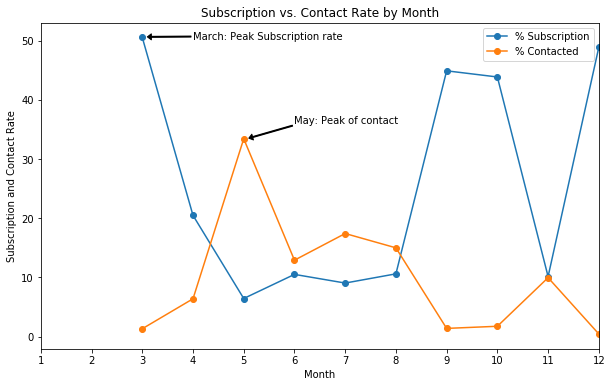

In [65]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

<b>Insights: initiate the telemarketing campaign in fall or spring</b>

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.

     The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.

     However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.

Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

# Data Preprocessing

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
               'euribor3m','nr.employed']].copy()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled = df_scaled.set_axis(['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
               'euribor3m','nr.employed'],axis=1,inplace= False)

In [20]:
df_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.643052,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.744648,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.287261,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,0.017525,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.643052,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [61]:
df_scaled.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,1.106094e-15,-3.170967e-16,1.845337e-14,9.515119e-14,2.196991e-13,-1.851020e-13,-5.933520e-14,-6.842191e-14,-6.864230e-14,-1.181213e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.319170e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00
25%,-7.952382e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01
50%,-1.856655e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01
75%,7.286935e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01
max,2.252625e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01


# Feature Selection 

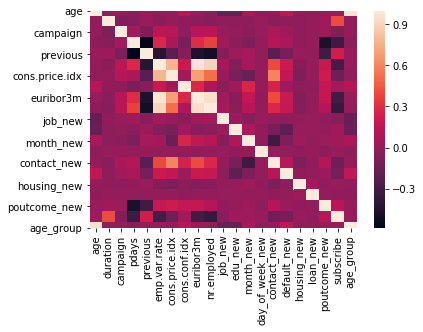

In [43]:
############## Multivariate Analysis ##################
sns.heatmap(df.corr())

In [44]:
df_scaled.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


The correltion plot shows that euribor3m, emp.var.rate and nr.employed are highly correlated. We will apply dimensional reduction to see if we can reduce them to only one component 

<p>We are also dropping <b>contact</b> because it does not have relevance in our analysis because the information is not very much related to customers and also does not have strong correlation with <b>subscribe</b> variable.</p>

In [45]:
df = df.drop('contact',axis=1)
df = df.drop('contact_new',axis=1)

In [51]:
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,subscribe,age_group,age_scaled,duration_scaled,campaign_scaled,pdays_scaled,previous_scaled,cons.price.idx_scaled,cons.conf.idx_scaled,nr.employed_scaled
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,...,0,50.0,1.643052,0.010471,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,...,0,50.0,1.744648,-0.421501,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
2,37,services,high.school,no,yes,no,telephone,may,mon,226,...,0,30.0,-0.287261,-0.124520,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,0,NaN,0.017525,-0.413787,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
4,56,services,high.school,no,no,yes,telephone,may,mon,307,...,0,50.0,1.643052,0.187888,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168


In [21]:
df_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.643052,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.744648,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.287261,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,0.017525,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.643052,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [46]:
df['age_scaled'] = df_scaled['age']
df['duration_scaled'] = df_scaled['duration']
df['campaign_scaled'] = df_scaled['campaign']
df['pdays_scaled'] = df_scaled['pdays']
df['previous_scaled'] = df_scaled['previous']
df['cons.price.idx_scaled'] = df_scaled['cons.price.idx']
df['cons.conf.idx_scaled'] = df_scaled['cons.conf.idx']
df['nr.employed_scaled'] = df_scaled['nr.employed']

In [69]:
df.head()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,...,subscribe,age_group,age_scaled,duration_scaled,campaign_scaled,pdays_scaled,previous_scaled,cons.price.idx_scaled,cons.conf.idx_scaled,nr.employed_scaled
0,56,housemaid,basic.4y,no,no,no,may,mon,261,1,...,0,50.0,1.643052,0.010471,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
1,57,services,high.school,unknown,no,no,may,mon,149,1,...,0,50.0,1.744648,-0.421501,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
2,37,services,high.school,no,yes,no,may,mon,226,1,...,0,30.0,-0.287261,-0.124520,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
3,40,admin.,basic.6y,no,no,no,may,mon,151,1,...,0,NaN,0.017525,-0.413787,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168
4,56,services,high.school,no,no,yes,may,mon,307,1,...,0,50.0,1.643052,0.187888,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.33168


# Train/Test Split

In [47]:
selected_columns = df[['age_scaled','duration_scaled','campaign_scaled','pdays_scaled','previous_scaled','cons.price.idx_scaled',
                      'cons.conf.idx_scaled','nr.employed','job_new','edu_new','default_new','housing_new','loan_new','month_new',
                      'day_of_week_new','poutcome_new']]
df_cleaned = selected_columns.copy()
df_cleaned.head()

,age_scaled,duration_scaled,campaign_scaled,pdays_scaled,previous_scaled,cons.price.idx_scaled,cons.conf.idx_scaled,nr.employed,job_new,edu_new,default_new,housing_new,loan_new,month_new,day_of_week_new,poutcome_new
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.722722,0.886447,5191.0,1060,4176,0,0,0,5,1,1
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.722722,0.886447,5191.0,3969,9515,1,0,0,5,1,1
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.722722,0.886447,5191.0,3969,9515,0,2,0,5,1,1
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.722722,0.886447,5191.0,10422,2292,0,0,0,5,1,1
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.722722,0.886447,5191.0,3969,9515,0,0,2,5,1,1


In [48]:
df_response = pd.DataFrame(df['subscribe'])
df_cleaned = pd.merge(df_cleaned,df_response, left_index = True, right_index = True)

In [49]:
array = df_cleaned.values

X = array[:,0:-1]

Y = array[:,-1]

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

#    Applying classification algorithm

<b>1. Support Vector Machine </b>

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train, Y_train)

SVC(random_state=1)

In [59]:
Y_pred = classifier.predict(X_test)

[[10978     0]
 [ 1379     0]]


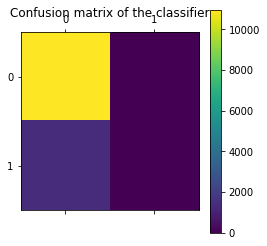

In [60]:
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test,Y_pred)

pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.8884033341425912
